In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/matt/readout/host/')
import ali_offline_demod as dm
import ali_iv_analysis_2 as iv
import imp
import glob
import pickle
from scipy import spatial
import h5py
from scipy.fft import fft, ifft, fftfreq
from copy import deepcopy
from scipy.interpolate import CubicSpline, interp1d
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm
import imp
import pandas as pd
from scipy.signal import savgol_filter as sg

/tmp/ipykernel_864829/3152699253.py:7: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
imp.reload(dm)

iv_file = 'toneinit_fcenter_4250.0_20240609160443_t_20240609161102'
#iv_file = 'toneinit_fcenter_4250.0_20240207130021_t_20240207130454'
#iv_file = 'toneinit_fcenter_4250.0_20240212164634_t_20240212172504'

"""
result = dm.full_iv_process(iv_file = iv_file,
                            f_sawtooth = 15, #Hz
                            Rsh=0.4,
                            demod_method='iv',
                            iv_path = '/home/matt/alicpt_data/IV_data',
                            filter_Rn_Al=True,
                            plot='True')
"""

result = iv.full_iv_process(iv_file,
                            f_sawtooth = 15,
                            Rsh=0.4,
                            iv_path = '/home/matt/ali_drive_mnt/IV_data',
                            filter_Rn_Al=False,
                            plot='None')



iv_path: /home/matt/ali_drive_mnt/IV_data
ts_directory: toneinit_fcenter_4250.0_20240609160443_t_20240609161102
tone init path: ali_drive_mnt/tone_initializations
looking for delay region


/home/matt/readout/host/ali_iv_analysis_2.py:584: RuntimeWarning: divide by zero encountered in log10
  y=np.append(y,20*np.log10(np.abs(test_sweep[1,:])))


start = 4038938078.125022
stop = 4048958585.937522
3.2365709720436144
n_phi0: 3.2365709720436144


  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/233 [00:00<?, ?it/s]

Text(0, 0.5, '$I_{TES}$ (mA)')

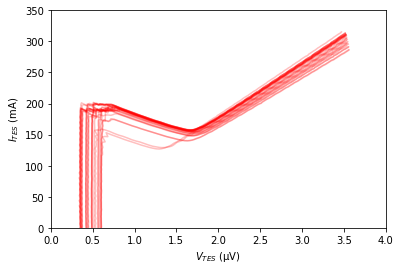

In [16]:
fig, ax = plt.subplots(1)

for i in range(len(result['Vtes'])):
    ax.plot(result['Vtes'][i],result['Ites'][i],'r',alpha=0.25)
    
ax.set_xlim([0,4])
ax.set_ylim([0,350])
ax.set_xlabel('$V_{TES}$ (μV)')
ax.set_ylabel('$I_{TES}$ (mA)')

In [24]:
pbias = iv.get_pbias(result, 90, plot=False)

bias_med = np.nanmedian(pbias)

print(pbias)
print(bias_med)

[          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
      

Text(0, 0.5, '$I_{TES}$ (mA)')

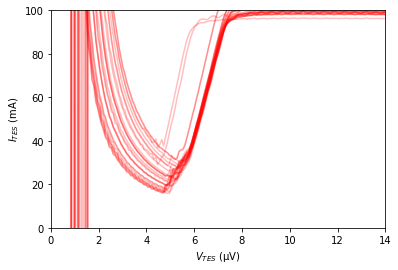

In [47]:
fig, ax = plt.subplots(1)

for i in range(len(result['Ites'])):
    ax.plot(result['Ibias'],result['Rtes'][i]/np.nanmedian(result['Rn Al'])*100,'r',alpha=0.25)
    
ax.set_xlim([0,14])
ax.set_ylim([0,100])
ax.set_xlabel('$V_{TES}$ (μV)')
ax.set_ylabel('$I_{TES}$ (mA)')

In [31]:
ts_file = 'ts_toneinit_fcenter_4250.0_20240609160443_t_20240609184403.hd5'
f_sawtooth=15

test_ts_processed = dm.full_demod_process(ts_file, 
                                          f_sawtooth, 
                                          method='fft', 
                                          n=0, 
                                          channels='all',
                                          correct_phase_jumps=True,
                                          start_channel=100,
                                          stop_channel=110,
                                          tone_init_path = '/home/matt/ali_drive_mnt/tone_initializations', 
                                          ts_path = '/home/matt/ali_drive_mnt/time_streams',
                                          display_mode = 'notebook')    

using full_demod_process
4250.0
20240609160443
/home/matt/ali_drive_mnt/tone_initializations/fcenter_4250.0_20240609160443/
num of channels: 1002
num of tones: 233
looking for delay region
start = 4038938078.125022
stop = 4048958585.937522
delay: 3.57348397372282e-08
3.57348397372282e-08
[4.04455290e+09+0.j 4.04925800e+09+0.j 4.05116680e+09+0.j
 4.05330676e+09+0.j 4.05589944e+09+0.j 4.05717113e+09+0.j
 4.05847373e+09+0.j 4.06022468e+09+0.j 4.06399414e+09+0.j
 4.06523640e+09+0.j 4.06692790e+09+0.j 4.06888167e+09+0.j
 4.07040739e+09+0.j 4.07254478e+09+0.j 4.07525963e+09+0.j
 4.07761112e+09+0.j 4.07905455e+09+0.j 4.08006920e+09+0.j
 4.08285440e+09+0.j 4.08409091e+09+0.j 4.08758398e+09+0.j
 4.08896396e+09+0.j 4.09026563e+09+0.j 4.09189848e+09+0.j
 4.09498642e+09+0.j 4.09774109e+09+0.j 4.09864258e+09+0.j
 4.10048716e+09+0.j 4.10223028e+09+0.j 4.10403111e+09+0.j
 4.10646487e+09+0.j 4.10908027e+09+0.j 4.11095236e+09+0.j
 4.11853344e+09+0.j 4.12083173e+09+0.j 4.12302260e+09+0.j
 4.12528095e+09

  0%|          | 0/233 [00:00<?, ?it/s]

In [23]:
fig, ax = plt.subplots(1)

ax.plot(test_ts_processed['fr t'], test_ts_processed['fr data'][1])

In [28]:
%matplotlib qt
fig, ax = plt.subplots(1)

for i in range(len(test_ts_processed['demod data'])):
    ax.plot(test_ts_processed['demod t'], test_ts_processed['demod data'][i] - np.average(test_ts_processed['demod data'][i]) + i*0.1)
    
ax.set_ylim([-0.01, 1])

(-0.01, 1.0)

In [30]:
fig2, ax2 = plt.subplots(1)

for i in range(len(test_ts_processed['demod data'])):
    ax2.plot(test_ts_processed['demod t'], test_ts_processed['demod data'][i] - np.average(test_ts_processed['demod data'][i]) + i*0.1)
    
ax2.set_ylim([-0.01, 1])

(-0.01, 1.0)

In [32]:
fig3, ax3 = plt.subplots(1)

for i in range(len(test_ts_processed['demod data'])):
    ax3.plot(test_ts_processed['demod t'], test_ts_processed['demod data'][i] - np.average(test_ts_processed['demod data'][i]) + i*0.1)
    
ax3.set_ylim([-0.01, 1])

(-0.01, 1.0)